<a href="https://colab.research.google.com/github/marianaborsari/biologia-pesqueira/blob/master/modelo_de_rendimento_por_recruta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODELO DE RENDIMENTO POR RECRUTA DE BEVERTON & HOLT**

Este modelo expressa a captura (quantidade da pesca) em uma “base por recruta”, ou seja, as capturas  relativas ao recrutamento dos organismos capturados.

Recrutamento é a inserção na população dos indivíduos que se tornam aptos à pesca, os recrutas.

O modelo nos permite calcular Y/R variando os valores de entrada dos diferentes parâmetros, tais como F e Tc, e então avaliar o efeito destes parâmetros sobre a captura por recruta da espécie sob investigação. 


Portanto, Y/R é considerado uma função de F e Tc. No entanto os gráficos são comumente plotados como Y/R por F.

É importante notar aqui que os dois parâmetros F e Tc são os que podem ser controlados pelos gestores da pesca, pois: F é proporcional ao esforço e Tc (tamanho mínimo de capura) é uma função da seletividade da arte.


---



*Objetivo:* Com dados de Esforço (F) e alguns parâmetros pré definidos, traçar curvas Y/R (captura por recruta) e B/R (biomassa por recruta)

*Parâmetros utilizados:* $W_{\infty} = 64, K = 1,  t_{0} = -0.2,  T_{r} = 0.2$ e $M = 1.8$


Índice de abreviações:

$K$ = parâmetro de crescimento de von Bertalanffy

$t_{o}$ = parâmetro de crescimento de von Bertalanffy

$T_{c}$ = idade da primeira captura

$W_{\infty}$ = peso assintótico

$M$ = mortalidade natural

$Z = F+M$, mortalidade total

Mais informações e fonte da teoria: http://www.fao.org/3/w5448p/W5448P14.htm


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (8,7)

In [0]:
F = np.array([0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3,3.5,4,4.5,5,100]) #Input manual dos dados de captura

Calcular o S expresso pela seguinte fórmula:

$ S = e^{-K*(Tc-t_{0})}$

In [0]:
def calc_S (Tc):
    s = (1/(np.exp(Tc+0.2)))
    return s

Calcular o exponencial pertencente à fórmula geral

$E = e^{-M*(Tc-Tr)}$

In [0]:
def calc_exp (Tc):
    e = (1/(np.exp(1.8*(Tc-0.2))))
    return e

Calcular os valores de Y/R seguindo a fórmula:

$Y/R = F * E * W_{inf} * (\frac {1}{Z}-\frac {3S}{Z+K}+ \frac {3S^2}{Z+2K} - \frac {3S^2}{Z+3K})  $

In [0]:
def calcula_YR (F,Tc):
    Winf, K, Tr, M = 64, 1, 0.2, 1.8
    S = calc_S(Tc)
    e = calc_exp (Tc)
        
    l = []
    for i in F:
        b = i*e*Winf*((1/(i+M)) - ((3*S)/(i+M+1)) + ((3*S*S)/(i+M+2*K)) - ((S**3)/(i+M+3*K)))
        l.append(b)
    
    YR = np.array (l)
    return YR  

In [0]:
YR02 = calcula_YR(F,0.2)
max02 = np.amax(YR02)
YR03 = calcula_YR(F,0.3)
max03 = np.amax(YR03)
YR1 = calcula_YR(F,1)
max10 = np.amax(YR1)

print("Valores MSY para cada valor de Tc utilizado:", 
      "\n", "Tc = 0.2 ->", max02, 
      "\n", "Tc = 0.3 ->",  max03, 
      "\n", "Tc = 1 ->  ", max10)

df_yr = pd.DataFrame({'F':F,'Y/R Tc = 0.2':YR02,'Y/R Tc = 0.3':YR03,'Y/R Tc = 1':YR1})
df_yr

Valores MSY para cada valor de Tc utilizado: 
 Tc = 0.2 -> 4.145815150870441 
 Tc = 0.3 -> 4.5391498281086005 
 Tc = 1 ->   5.147438621450801


,F,Y/R Tc = 0.2,Y/R Tc = 0.3,Y/R Tc = 1
0,0.0,0.000000,0.000000,0.000000
1,0.2,1.362404,1.333790,0.792679
2,0.4,2.282181,2.261978,1.405462
3,0.6,2.910403,2.918738,1.889662
4,0.8,3.341890,3.389187,2.279418
5,1.0,3.637977,3.729010,2.598179
6,1.2,3.839358,3.975596,2.862503
7,1.4,3.973626,4.154621,3.084354
8,1.6,4.059838,4.284059,3.272560
9,1.8,4.111372,4.376707,3.433751


Calcular B/R utilizando

$B/R = \frac{Y/R}{F}$

In [0]:
def calcula_BR (YR,F):
    l = [0]
    for i in range(1,len(F)):
        n = YR[i]/(F[i])
        l.append(n)
    
    BR = np.array(l)
    return BR

In [0]:
BR02 = calcula_BR(YR02,F)
max2 = np.amax(BR02)
BR03 = calcula_BR(YR03,F)
max3 = np.amax(BR03)
BR1 = calcula_BR(YR1,F)
max1 = np.amax(BR1)

print("Valores BMSY para cada valor de Tc utilizado:", 
      "\n", "Tc = 0.2 ->", max2, 
      "\n", "Tc = 0.3 ->",  max3, 
      "\n", "Tc = 1 ->  ", max1)

df_br = pd.DataFrame({'F':F,'B/R Tc = 0.2':BR02,'B/R Tc = 0.3':BR03,'B/R Tc = 1':BR1})
df_br

Valores BMSY para cada valor de Tc utilizado: 
 Tc = 0.2 -> 6.812021418869538 
 Tc = 0.3 -> 6.668951813312822 
 Tc = 1 ->   3.9633959123094


,F,B/R Tc = 0.2,B/R Tc = 0.3,B/R Tc = 1
0,0.0,0.000000,0.000000,0.000000
1,0.2,6.812021,6.668952,3.963396
2,0.4,5.705453,5.654945,3.513655
3,0.6,4.850672,4.864563,3.149437
4,0.8,4.177363,4.236484,2.849272
5,1.0,3.637977,3.729010,2.598179
6,1.2,3.199465,3.312997,2.385419
7,1.4,2.838304,2.967586,2.203110
8,1.6,2.537399,2.677537,2.045350
9,1.8,2.284095,2.431504,1.907639


**GRÁFICOS**

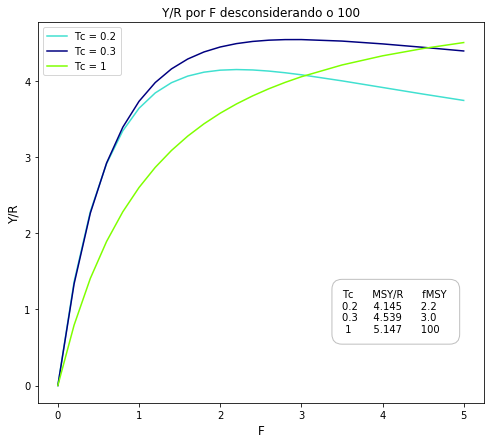

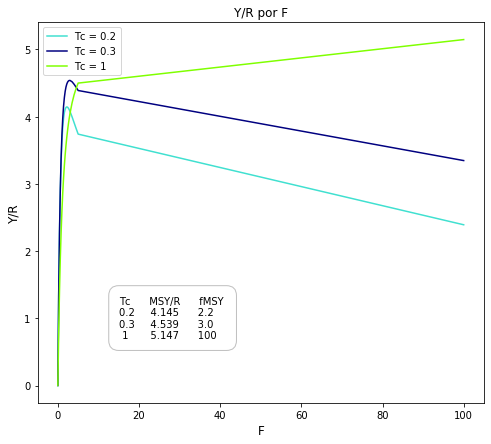

In [0]:
plt.title("Y/R por F desconsiderando o 100")
plt.plot(F[:-1],YR02[:-1], c="turquoise", label='Tc = 0.2')
plt.plot(F[:-1],YR03[:-1], c="navy", label='Tc = 0.3')
plt.plot(F[:-1],YR1[:-1], c="chartreuse", label='Tc = 1')
plt.xlabel("F", fontsize= 'large' )
plt.ylabel("Y/R", fontsize= 'large')
plt.legend (loc = 'best')
plt.annotate("Tc      MSY/R      fMSY \n0.2     4.145      2.2 \n0.3     4.539      3.0 \n 1       5.147      100 ", 
             (3.5,0.7),
             bbox=dict(facecolor='none', edgecolor='silver', boxstyle='round,pad=1'))

plt.show()

plt.title("Y/R por F")
plt.plot(F,YR02, c="turquoise", label='Tc = 0.2')
plt.plot(F,YR03, c="navy", label='Tc = 0.3')
plt.plot(F,YR1, c="chartreuse", label='Tc = 1')
plt.xlabel("F", fontsize= 'large')
plt.ylabel("Y/R", fontsize= 'large')
plt.legend (loc = 'best')
plt.annotate("Tc      MSY/R      fMSY \n0.2     4.145      2.2 \n0.3     4.539      3.0 \n 1       5.147      100 ", 
             (15,0.7),
             bbox=dict(facecolor='none', edgecolor='silver', boxstyle='round,pad=1'))
plt.show()

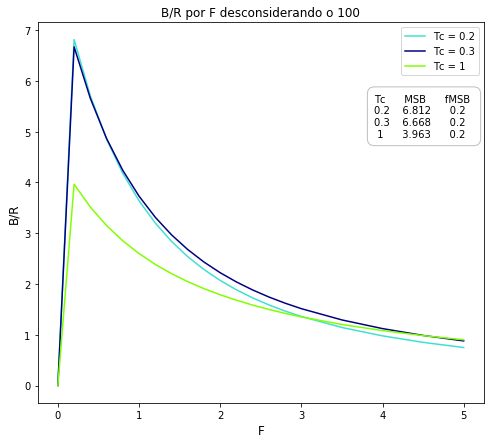

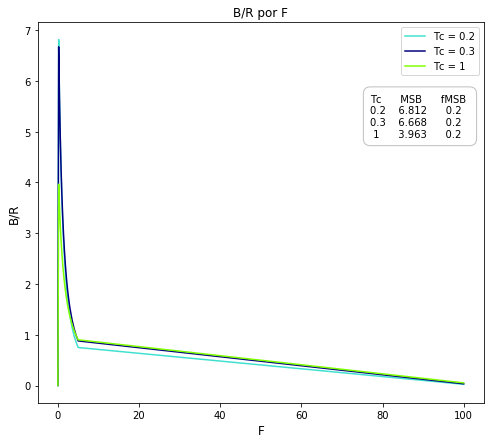

In [0]:
plt.title("B/R por F desconsiderando o 100")
plt.plot(F[:-1],BR02[:-1], c="turquoise", label='Tc = 0.2')
plt.plot(F[:-1],BR03[:-1], c="navy", label='Tc = 0.3')
plt.plot(F[:-1],BR1[:-1], c="chartreuse", label='Tc = 1')
plt.xlabel("F",fontsize= 'large')
plt.ylabel("B/R", fontsize= 'large')
plt.legend (loc = 'best')
plt.annotate("Tc      MSB      fMSB \n0.2    6.812      0.2 \n0.3    6.668      0.2 \n 1      3.963      0.2 ", 
             (3.9,4.9),
             bbox=dict(facecolor='none', edgecolor='silver', boxstyle='round,pad=0.7'))
plt.show()

plt.title("B/R por F")
plt.plot(F,BR02, c="turquoise", label='Tc = 0.2')
plt.plot(F,BR03, c="navy", label='Tc = 0.3')
plt.plot(F,BR1, c="chartreuse", label='Tc = 1')
plt.xlabel("F", fontsize= 'large')
plt.ylabel("B/R", fontsize= 'large')
plt.legend (loc = 'best')
plt.annotate("Tc      MSB      fMSB \n0.2    6.812      0.2 \n0.3    6.668      0.2 \n 1      3.963      0.2 ", 
             (77,4.9),
             bbox=dict(facecolor='none', edgecolor='silver', boxstyle='round,pad=0.7'))
plt.show()